In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize']=(6,6)
#plt.rcParams['font.weight']='bold'
#plt.rcParams['axes.labelweight']='bold'
#plt.rcParams['lines.linewidth']=1.5
#plt.rcParams['lines.markeredgewidth']=2
%matplotlib inline
%config InlineBackend.figure_format = "retina"

sys.path.append('/Applications/OpenFUSIONToolkit/python')
from OpenFUSIONToolkit.TokaMaker import TokaMaker
from OpenFUSIONToolkit.TokaMaker.meshing import load_gs_mesh
from OpenFUSIONToolkit.TokaMaker.util import create_isoflux, read_eqdsk

from omfit_classes.omfit_eqdsk import boundaryShape

In [2]:
mygs = TokaMaker()
mesh_pts,mesh_lc,mesh_reg,coil_dict,cond_dict = load_gs_mesh('nextstep_mesh_0801.h5')
mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
mygs.setup_regions(cond_dict=cond_dict,coil_dict=coil_dict)
mygs.setup(order=2,F0=1*3)

#----------------------------------------------
Open FUSION Toolkit Initialized
Development branch:   main
Revision id:          aba6d8f
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  6.143E+00
    # of points  =   10020
    # of edges   =   29927
    # of cells   =   19908
    # of boundary points =     130
    # of boundary edges  =     130
    # of boundary cells  =     130
  Resolution statistics:
    hmin =  3.000E-03
    hrms =  2.845E-02
    hmax =  1.1

In [30]:
import json
with open('nsf_geom_new.json','r') as fid:
    nsf_geom = json.load(fid)

Text(0.83, 0.16, 'Passive \nplates')

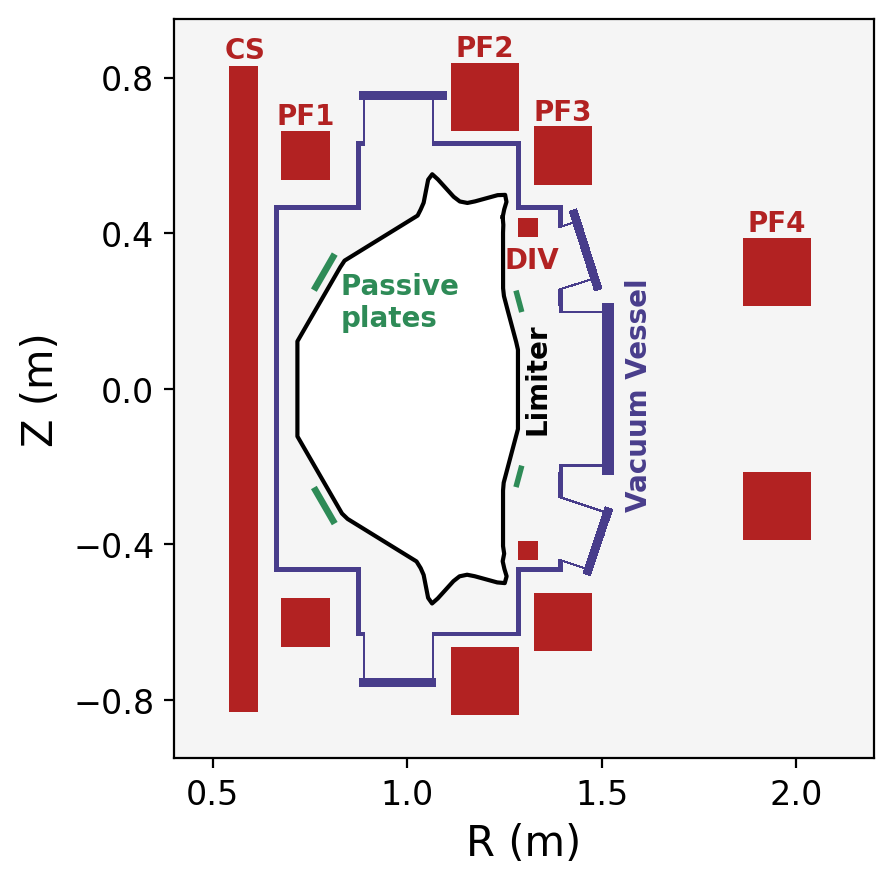

In [52]:
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
fig, ax = plt.subplots()
mygs.plot_machine(fig,ax, coil_color = 'firebrick', cond_color = 'darkslateblue')
plt.xlim([0.4, 2.2])
plt.ylim([-0.95, 0.95])
plt.xlabel('R (m)', fontsize = 15)
plt.ylabel('Z (m)', fontsize = 15)
plt.yticks([-0.8, -0.4, 0, 0.4, 0.8])
plt.text(0.665, 0.68, 'PF1', c = 'firebrick', fontweight = 'bold')
plt.text(1.125, 0.855, 'PF2', c = 'firebrick', fontweight = 'bold')
plt.text(1.325, 0.69, 'PF3', c = 'firebrick', fontweight = 'bold')
plt.text(1.875, 0.405, 'PF4', c = 'firebrick', fontweight = 'bold')
plt.text(0.53, 0.85, 'CS', c = 'firebrick', fontweight = 'bold')

#plt.text(0.88, 0.56, 'DIV1', c = 'r', fontweight = 'bold')
plt.text(1.25, 0.31, 'DIV', c = 'firebrick', fontweight = 'bold')

plt.text(1.56, -0.3, 'Vacuum Vessel', c = 'darkslateblue', fontweight = 'bold', rotation = 'vertical')
plt.text(1.3, -0.1, 'Limiter', c = 'k', fontweight = 'bold', rotation = 'vertical')

plt.fill(np.array(nsf_geom['in_lower_plate'])[:,0]/1000, np.array(nsf_geom['in_lower_plate'])[:,1]/1000, color = 'seagreen')
plt.fill(np.array(nsf_geom['in_upper_plate'])[:,0]/1000, np.array(nsf_geom['in_upper_plate'])[:,1]/1000, color = 'seagreen')
plt.fill(np.array(nsf_geom['out_lower_plate'])[:,0]/1000, np.array(nsf_geom['out_lower_plate'])[:,1]/1000, color = 'seagreen')
plt.fill(np.array(nsf_geom['out_upper_plate'])[:,0]/1000, np.array(nsf_geom['out_upper_plate'])[:,1]/1000, color = 'seagreen')

plt.text(0.83, 0.16, 'Passive \nplates', c = 'seagreen', fontweight = 'bold')